<a href="https://colab.research.google.com/github/arindamdeyofficial/XRay_Pneumonia_Deep_Nural_Network_Analysis/blob/main/XRay_Pneumonia_Deep_Nural_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries/Dataset (0 mark)
  1. Import the required libraries and the dataset (use Google Drive if required).
  2. Check the GPU available (recommended- use free GPU provided by Google Colab).

In [1]:
#libraries
import numpy as np 
import pandas as pd 
import random

# folder
import os
import glob

# image
from PIL import Image

# visu
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('image', cmap='gray')

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#image opencv
import cv2
from google.colab.patches import cv2_imshow
import random

#google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
print(tf.__version__)

2.7.0


In [2]:
train_path ='/content/drive/My Drive/Colab Notebooks/chest_xray/train'
test_path = '/content/drive/My Drive/Colab Notebooks/chest_xray/test'
val_path = '/content/drive/My Drive/Colab Notebooks/chest_xray/val'

In [3]:
!ls "/content/drive/My Drive/Colab Notebooks/chest_xray"

test  train  val


2. Data Visualization and augmentation (1 mark)
  1. Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).

In [45]:
IMAGE_SIZE= (224, 224)
BATCH_SIZE = 32

print("Training Dataset.....")
train_dir = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                                validation_split=0.2,
                                                                subset="training",
                                                                seed=123,
                                                               image_size=IMAGE_SIZE,
                                                               batch_size=BATCH_SIZE)

Training Dataset.....
Found 5216 files belonging to 2 classes.
Using 4173 files for training.


In [47]:
print("Val Dataset....")
val_dir = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                                validation_split=0.2,
                                                                subset="validation",
                                                                seed=123,
                                                               image_size=IMAGE_SIZE,
                                                               batch_size=BATCH_SIZE)

Val Dataset....
Found 16 files belonging to 2 classes.
Using 3 files for validation.


In [48]:
print("Test Datast...")
test_dir = tf.keras.preprocessing.image_dataset_from_directory(test_path,
                                                                validation_split=0.2,
                                                                subset="validation",
                                                                seed=123,
                                                               image_size=IMAGE_SIZE,
                                                               batch_size=BATCH_SIZE)

Test Datast...
Found 624 files belonging to 2 classes.
Using 124 files for validation.


In [49]:
# Check the Class names
class_names = train_dir.class_names
class_names

['NORMAL', 'PNEUMONIA']

In [8]:
for images, labels in train_dir.take(1):
    images = images[0]/255.
    print(images)

tf.Tensor(
[[[0.01176471 0.01176471 0.01176471]
  [0.0245098  0.0245098  0.0245098 ]
  [0.03039216 0.03039216 0.03039216]
  ...
  [0.0754902  0.0754902  0.0754902 ]
  [0.06547619 0.06547619 0.06547619]
  [0.04194678 0.04194678 0.04194678]]

 [[0.01176471 0.01176471 0.01176471]
  [0.0245098  0.0245098  0.0245098 ]
  [0.03039216 0.03039216 0.03039216]
  ...
  [0.0754902  0.0754902  0.0754902 ]
  [0.07023809 0.07023809 0.07023809]
  [0.04607843 0.04607843 0.04607843]]

 [[0.01176471 0.01176471 0.01176471]
  [0.0245098  0.0245098  0.0245098 ]
  [0.03039216 0.03039216 0.03039216]
  ...
  [0.07864147 0.07864147 0.07864147]
  [0.06334034 0.06334034 0.06334034]
  [0.0384979  0.0384979  0.0384979 ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0

In [9]:
# Pretech to our required directories
train_ds = train_dir.prefetch(tf.data.AUTOTUNE)
val_ds = val_dir.prefetch(tf.data.AUTOTUNE)
test_ds = test_dir.prefetch(tf.data.AUTOTUNE)

In [ ]:
train_ds

<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 1)), types: (tf.float32, tf.float32)>

In [66]:
def showClassImages(dataSet):
  plt.figure(figsize=(10, 10))
  for images, labels in dataSet.take(1):
    for i in range(3):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

Showing class specific images for each type of data

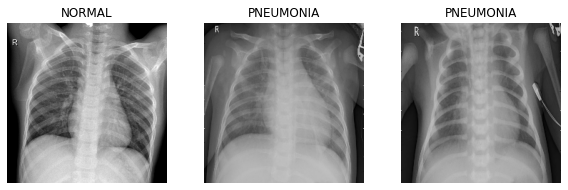

In [67]:
showClassImages(train_dir)

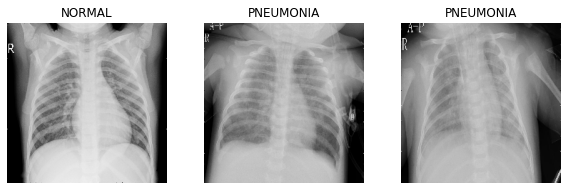

In [68]:
showClassImages(val_dir)

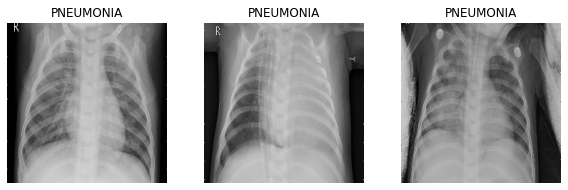

In [69]:
showClassImages(test_dir)

In [70]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    flipped = tf.image.flip_left_right(original)
    plt.show()

In [12]:
#fig,ax=plt.subplots(n_rows,n_cols,sharex=False,sharey=False,figsize=(width,height))

import matplotlib.image as mpimg
img = mpimg.imread('i.png')
imgplot = plt.imshow(img)

NameError: ignored

2. Data Visualization and augmentation (1 mark)
  2. Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented image and the original image for each class and each augmentation.

In [ ]:
data_augmentation = tf.keras.Sequential([
     keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     keras.layers.experimental.preprocessing.RandomRotation(0.2)])

In [ ]:
from os import listdir
from os.path import isfile, join
normalImagePaths = [join(train_path, 'NORMAL', p) for p in os.listdir(join(train_path, 'NORMAL'))]
for image in normalImagePaths:
  #visualize(normalImagePaths[0], showAugmentedImages(normalImagePaths[0]))
  image = tf.expand_dims(image, 0)
  plt.figure(figsize=(10, 10))
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

ValueError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
# Early Stopping Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                 patience=3)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

# Baseline model
model_0 = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Dropout(0.5),
    Conv2D(16, 3, activation='relu'),
    MaxPool2D(),
    Dropout(0.5),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_0.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

# Get the summary
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 16)        0

In [ ]:
# fit the model
history_model_0 = model_0.fit(train_ds,
                           epochs=5,
                           validation_data=val_ds,
                           callbacks=[early_stopping])

Epoch 1/5
163/163 [==============================] - 1251s 8s/step - loss: 22.2952 - accuracy: 0.7828 - val_loss: 0.4910 - val_accuracy: 0.6875
Epoch 2/5
163/163 [==============================] - 40s 234ms/step - loss: 0.3653 - accuracy: 0.8844 - val_loss: 0.2744 - val_accuracy: 0.8750
Epoch 3/5
163/163 [==============================] - 39s 229ms/step - loss: 0.2142 - accuracy: 0.9271 - val_loss: 0.2852 - val_accuracy: 0.8125
Epoch 4/5
163/163 [==============================] - 40s 233ms/step - loss: 0.1605 - accuracy: 0.9475 - val_loss: 0.2919 - val_accuracy: 0.8750
Epoch 5/5
163/163 [==============================] - 40s 232ms/step - loss: 0.1346 - accuracy: 0.9576 - val_loss: 0.2404 - val_accuracy: 0.8750


In [ ]:
# Plot the loss curves
def plot_loss_curves(history):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)


    plt.plot(epochs, acc,  label='Training acc')
    plt.plot(epochs, val_acc,  label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()


    plt.plot(epochs, loss,  label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

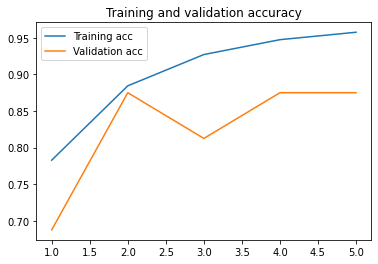

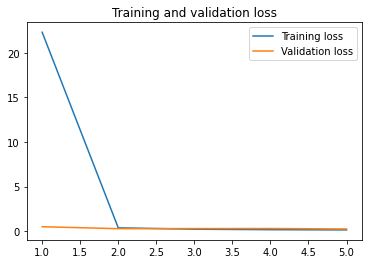

In [ ]:
plot_loss_curves(history_model_0)